In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

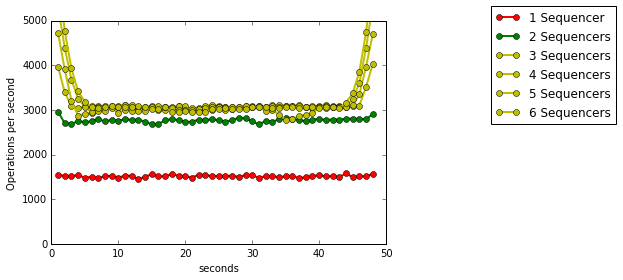

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

s = sum_throughput(glob.glob("1seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='o', linewidth=2.0, label="1 Sequencer")

s = sum_throughput(glob.glob("2seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'g-', marker='o', linewidth=2.0, label="2 Sequencers")

s = sum_throughput(glob.glob("3seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'y-', marker='o', linewidth=2.0, label="3 Sequencers")

s = sum_throughput(glob.glob("4seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'y-', marker='o', linewidth=2.0, label="4 Sequencers")

s = sum_throughput(glob.glob("5seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'y-', marker='o', linewidth=2.0, label="5 Sequencers")

s = sum_throughput(glob.glob("6seq-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'y-', marker='o', linewidth=2.0, label="6 Sequencers")

ax.set_ylim(0, 5000)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))

,seconds,1,2,3,4,5,6
10,50:50:,1483,2756,3060,3097,2939,3070
11,55:55:,1526,2792,3110,3106,3002,3073
12,60:60:,1524,2774,3109,3042,2983,3072
13,65:65:,1442,2782,3069,3058,2970,3076
14,70:70:,1504,2736,3055,3053,2968,3061


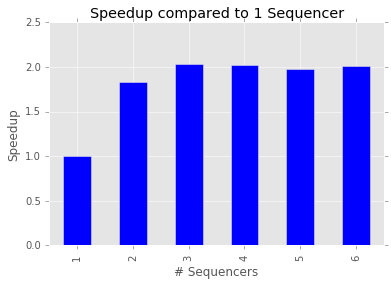

In [102]:
# Get the sum of all the 1 sequencer experiment throughputs
df = sum_throughput(glob.glob("1seq-baseline-issdm-*throughput.csv"))
df.columns = ['seconds', '1']

# Append all the dfs together into one table
for i in [2, 3, 4, 5, 6]:
    s = sum_throughput(glob.glob(str(i) + "seq-baseline-issdm-*throughput.csv"))
    name = str(i) 
    s.columns = ['seconds', name]
    df = pd.concat([df, s[name]], axis=1)

# Trim off the unstable throughputs
df = df.drop(df.index[range(0, 10)])
df = df.drop(df.index[range(30, len(df))])
ax = (df.mean()/df['1'].mean()).plot.bar()
ax.set_xlabel("# Sequencers")
ax.set_ylabel("Speedup")
x = ax.set_title("Speedup compared to 1 Sequencer")

df.head()